In [181]:
import pandas as pd

real_df = pd.read_csv('../Datasets/btc_2014_2025.csv')
df = real_df.copy()

In [182]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4111 entries, 0 to 4110
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    4111 non-null   object 
 1   open    4111 non-null   float64
 2   high    4111 non-null   float64
 3   low     4111 non-null   float64
 4   close   4111 non-null   float64
 5   volume  4111 non-null   int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 192.8+ KB


In [183]:
df.head()

,date,open,high,low,close,volume
0,2014-09-17,465.864014,468.174011,452.421997,457.334015,21056800
1,2014-09-18,456.859985,456.859985,413.104004,424.440002,34483200
2,2014-09-19,424.102997,427.834991,384.532013,394.795990,37919700
3,2014-09-20,394.673004,423.295990,389.882996,408.903992,36863600
4,2014-09-21,408.084991,412.425995,393.181000,398.821014,26580100


In [184]:
df.describe()

,open,high,low,close,volume
count,4111.000000,4111.000000,4111.000000,4111.000000,4.111000e+03
mean,26635.839533,27173.842936,26065.720368,26655.486764,2.160238e+10
std,31503.894880,32045.443640,30923.093545,31513.868482,2.290502e+10
min,176.897003,211.731003,171.509995,178.102997,5.914570e+06
25%,2674.179932,2763.579956,2570.520020,2669.770020,1.230715e+09
50%,10677.754883,10945.347656,10380.260742,10692.716797,1.704727e+10
75%,41955.906250,42775.460938,40954.689453,41981.511719,3.310138e+10
max,124752.140625,126198.070312,123196.046875,124752.531250,3.509679e+11


In [185]:
df.isnull().sum()

date      0
open      0
high      0
low       0
close     0
volume    0
dtype: int64

In [186]:
df.duplicated().sum()

np.int64(0)

In [187]:
df['date'] = pd.to_datetime(df['date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4111 entries, 0 to 4110
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    4111 non-null   datetime64[ns]
 1   open    4111 non-null   float64       
 2   high    4111 non-null   float64       
 3   low     4111 non-null   float64       
 4   close   4111 non-null   float64       
 5   volume  4111 non-null   int64         
dtypes: datetime64[ns](1), float64(4), int64(1)
memory usage: 192.8 KB


In [188]:
df = df.assign(
    year=df['date'].dt.year,
    month=df['date'].dt.month,
    week=df['date'].dt.isocalendar().week.astype(int),
    day=df['date'].dt.day,
    weekday=df['date'].dt.weekday, # 0=Monday
    day_of_year=df['date'].dt.dayofyear
)
df.head()

,date,open,high,low,close,volume,year,month,week,day,weekday,day_of_year
0,2014-09-17,465.864014,468.174011,452.421997,457.334015,21056800,2014,9,38,17,2,260
1,2014-09-18,456.859985,456.859985,413.104004,424.440002,34483200,2014,9,38,18,3,261
2,2014-09-19,424.102997,427.834991,384.532013,394.795990,37919700,2014,9,38,19,4,262
3,2014-09-20,394.673004,423.295990,389.882996,408.903992,36863600,2014,9,38,20,5,263
4,2014-09-21,408.084991,412.425995,393.181000,398.821014,26580100,2014,9,38,21,6,264


In [189]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4111 entries, 0 to 4110
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   date         4111 non-null   datetime64[ns]
 1   open         4111 non-null   float64       
 2   high         4111 non-null   float64       
 3   low          4111 non-null   float64       
 4   close        4111 non-null   float64       
 5   volume       4111 non-null   int64         
 6   year         4111 non-null   int32         
 7   month        4111 non-null   int32         
 8   week         4111 non-null   int64         
 9   day          4111 non-null   int32         
 10  weekday      4111 non-null   int32         
 11  day_of_year  4111 non-null   int32         
dtypes: datetime64[ns](1), float64(4), int32(5), int64(2)
memory usage: 305.2 KB


In [190]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [191]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_hist_box(
    df,
    col,
    bins=50,
    kde=True,
    showfliers=False,
    figsize=(10, 6)
):
    """
    Menampilkan histogram (atas) + boxplot (bawah) untuk satu kolom numerik.

    Parameters
    ----------
    df : pd.DataFrame
        Dataframe input
    col : str
        Nama kolom numerik
    bins : int, default=50
        Jumlah bin histogram
    kde : bool, default=True
        Tampilkan KDE di histogram
    showfliers : bool, default=False
        Tampilkan outlier di boxplot
    figsize : tuple, default=(10, 6)
        Ukuran figure
    """

    fig, axes = plt.subplots(
        nrows=2,
        ncols=1,
        figsize=figsize,
        gridspec_kw={'height_ratios': [3, 1]}
    )

    # Histogram (atas)
    sns.histplot(
        data=df,
        x=col,
        bins=bins,
        kde=kde,
        ax=axes[0]
    )
    axes[0].set_title(f'{col.upper()} Distribution')
    axes[0].set_xlabel('')
    axes[0].set_ylabel('Frequency')

    # Boxplot (bawah)
    sns.boxplot(
        data=df,
        x=col,
        ax=axes[1],
        showfliers=showfliers
    )
    axes[1].set_title(f'{col.upper()} Boxplot')
    axes[1].set_xlabel(col)

    plt.tight_layout()
    plt.show()

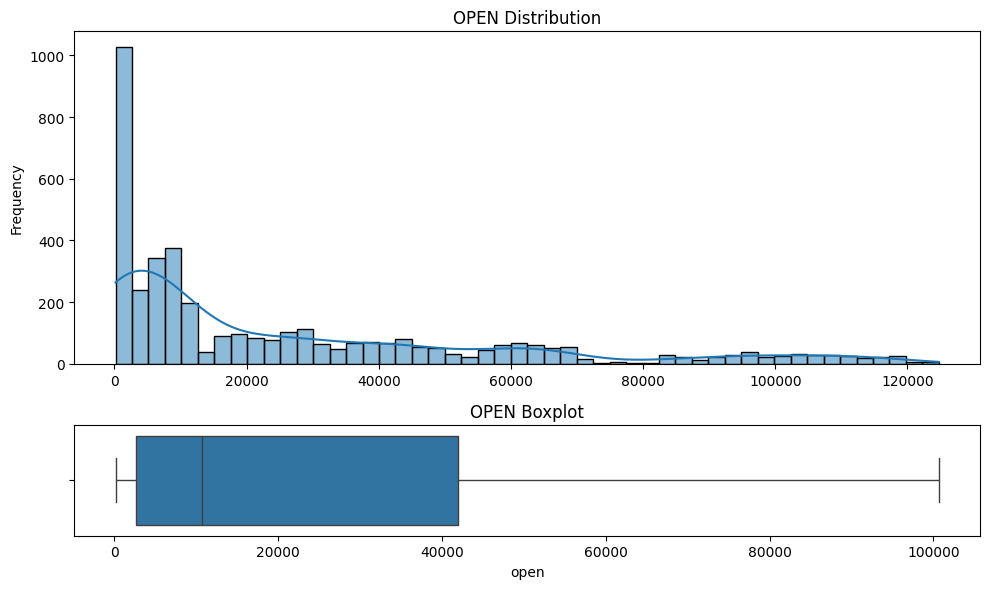

In [192]:
plot_hist_box(df, 'open')

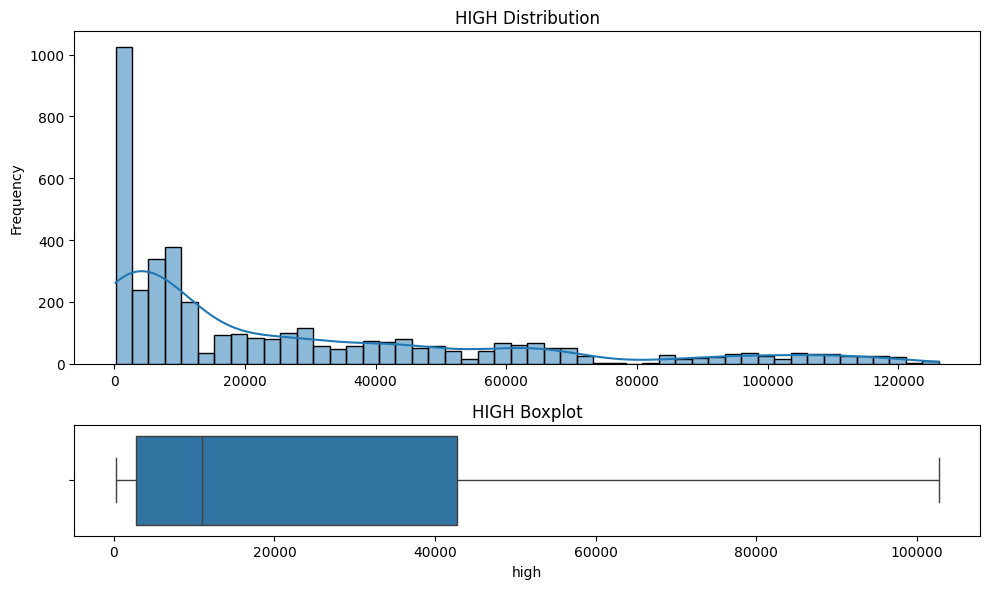

In [193]:
plot_hist_box(df, 'high')

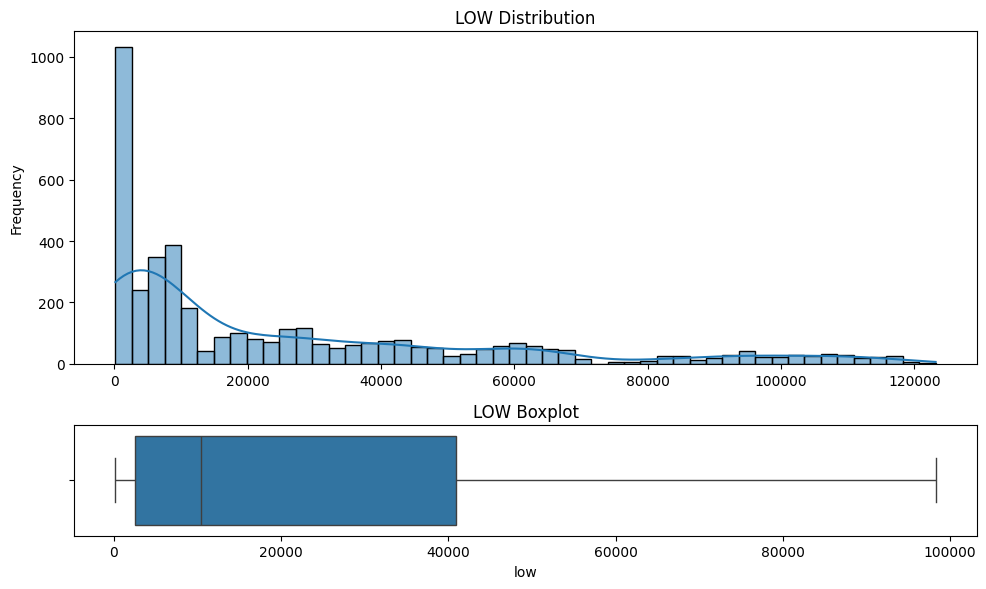

In [194]:
plot_hist_box(df, 'low')

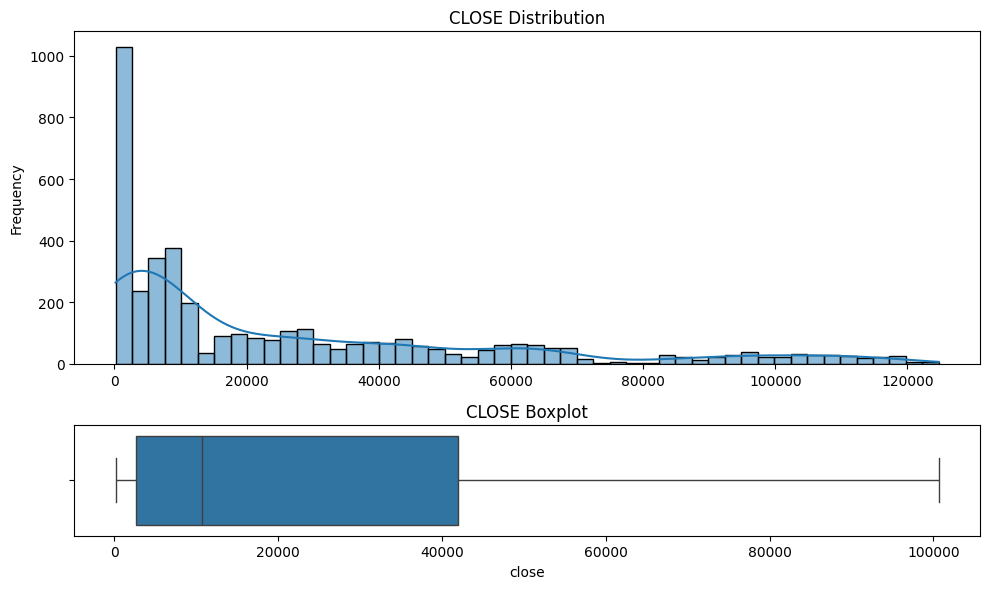

In [195]:
plot_hist_box(df, 'close')

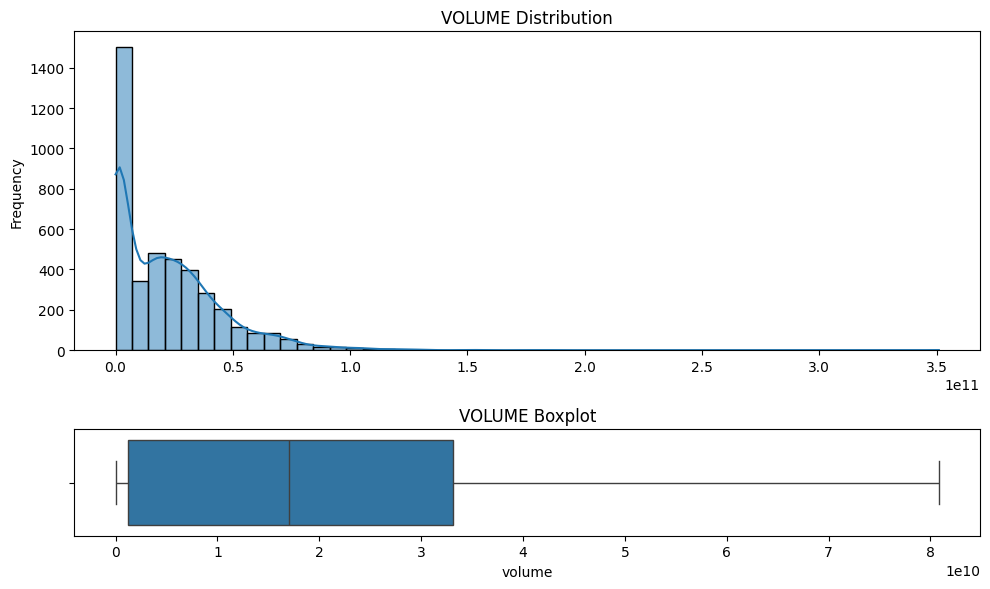

In [196]:
plot_hist_box(df, 'volume')

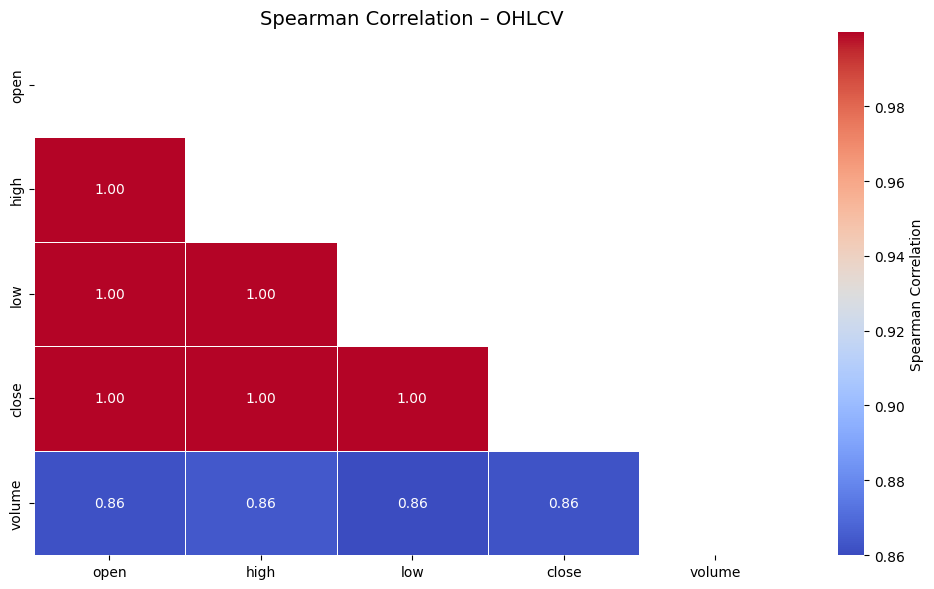

In [197]:
ohlcv_cols = ['open', 'high', 'low', 'close', 'volume']
df_ohlcv = df[ohlcv_cols]

spearman_corr = df_ohlcv.corr(method='spearman')

mask = np.triu(np.ones_like(spearman_corr, dtype=bool))

plt.figure(figsize=(10, 6))
sns.heatmap(
    spearman_corr,
    mask=mask,
    cmap='coolwarm',
    annot=True,
    fmt='.2f',
    linewidths=0.5,
    cbar_kws={'label': 'Spearman Correlation'}
)

plt.title('Spearman Correlation – OHLCV', fontsize=14)
plt.tight_layout()
plt.show()

In [198]:
import matplotlib.pyplot as plt

def plot_trend_close_ma_volume(
    df,
    date_col='date',
    price_col='close',
    volume_col='volume',
    ma_windows=(30, 90),
    figsize=(14, 8)
):
    """
    Plot trend close price dengan moving averages dan volume.

    Parameters
    ----------
    df : pd.DataFrame
        Dataframe input
    date_col : str
        Kolom tanggal
    price_col : str
        Kolom harga (default: close)
    volume_col : str
        Kolom volume
    ma_windows : tuple
        Window moving average, misal (30, 90)
    figsize : tuple
        Ukuran figure
    """

    df_plot = df.copy().sort_values(date_col)

    fig, axes = plt.subplots(
        nrows=2,
        ncols=1,
        figsize=figsize,
        sharex=True,
        gridspec_kw={'height_ratios': [3, 1]}
    )

    # =========================
    # Panel atas: Close + MA
    # =========================
    axes[0].plot(
        df_plot[date_col],
        df_plot[price_col],
        label='Close',
        linewidth=1.2
    )

    for w in ma_windows:
        axes[0].plot(
            df_plot[date_col],
            df_plot[price_col].rolling(w).mean(),
            label=f'MA {w}',
            linewidth=1.5
        )

    axes[0].set_title('Price Trend with Moving Averages')
    axes[0].set_ylabel('Price')
    axes[0].legend()
    axes[0].grid(alpha=0.3)

    # =========================
    # Panel bawah: Volume
    # =========================
    axes[1].bar(
        df_plot[date_col],
        df_plot[volume_col],
        width=1,
        alpha=0.7
    )
    axes[1].set_ylabel('Volume')
    axes[1].set_xlabel('Date')
    axes[1].grid(alpha=0.3)

    plt.tight_layout()
    plt.show()

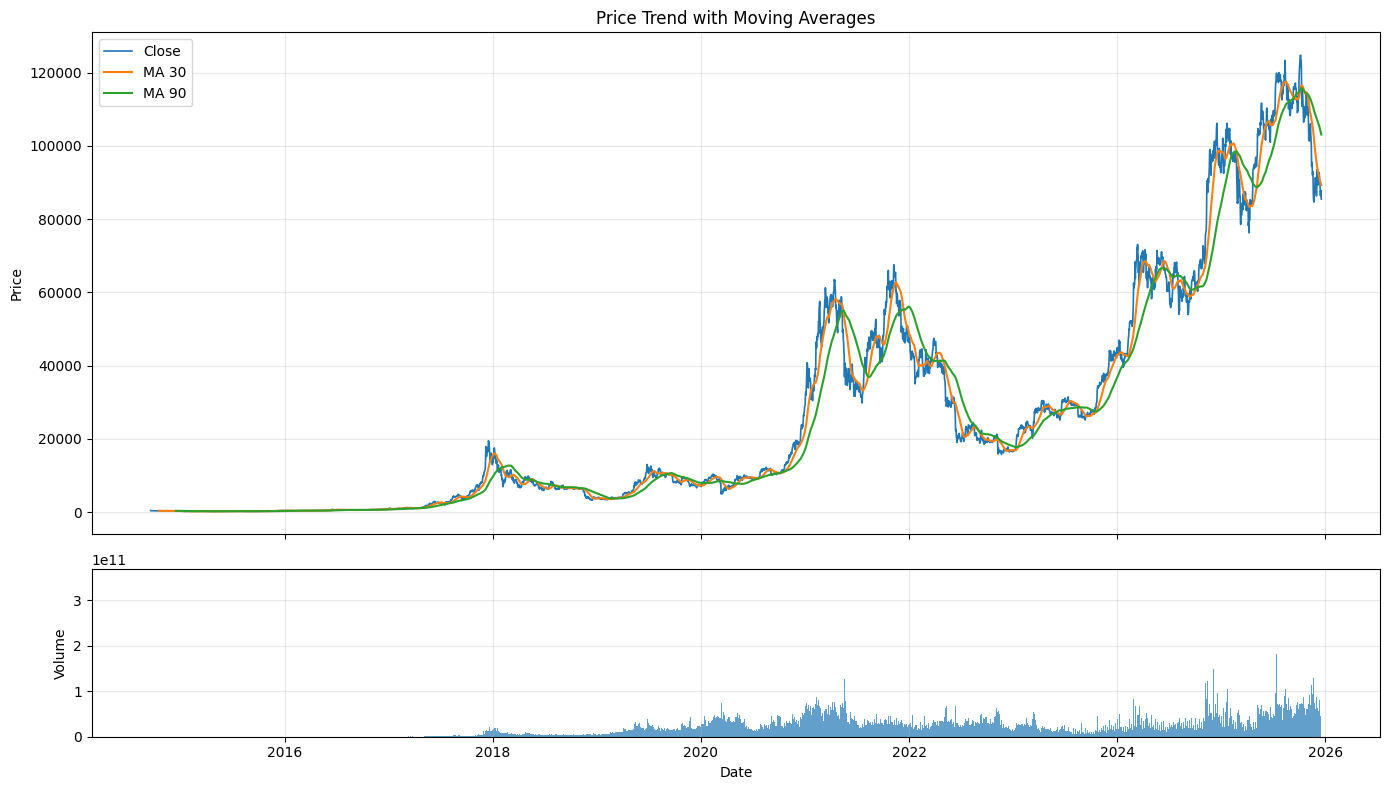

In [199]:
plot_trend_close_ma_volume(df)

In [201]:
# Pola bulanan
df.groupby('month')['close'].mean()

# Pola weekday
df.groupby('weekday')['close'].mean()

# Heatmap month x year
pivot = df.pivot_table(
    values='close',
    index='year',
    columns='month',
    aggfunc='mean'
)


In [202]:
pivot

month,1,2,3,4,5,6,7,8,9,10,11,12
year,,,,,,,,,,,,
2014,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,407.182428,364.148873,366.099799,341.267871
2015,248.782547,234.153645,269.042259,235.491534,236.997001,238.081766,279.563740,250.733805,233.595533,264.855356,348.883332,424.464547
2016,410.844485,404.408274,416.525774,434.339398,461.954415,642.869061,661.356103,579.585197,605.848633,643.550935,726.349101,828.060356
2017,914.916159,1062.533672,1129.365228,1206.641007,1895.383529,2636.204346,2519.418386,3880.989998,4064.836312,5360.071604,7813.132975,15294.270980
2018,13085.558090,9472.001151,9040.557097,8033.596631,8450.997732,6793.507666,7146.349987,6700.129946,6610.675033,6485.118747,5404.250171,3717.488344
2019,3701.554963,3711.907261,3976.069100,5178.469434,7309.694131,9415.900179,10669.336158,10643.248362,9814.067871,8411.929168,8373.572412,7284.013042
2020,8389.270476,9630.722185,6871.016113,7224.477327,9263.151745,9489.227214,9589.899729,11652.394185,10660.276855,11886.978201,16645.757422,21983.137097
2021,34761.649950,46306.798968,54998.008695,57206.720052,46443.286668,35845.154687,34444.973790,45709.022681,45939.771484,57911.970514,60621.488802,49263.209173
2022,41114.422379,40763.474051,41966.237525,41435.319661,31706.105217,24383.685482,21539.253843,22366.266318,19804.779232,19650.525643,17600.814323,16949.608808
